In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import pandas as pd
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['font.family'] = 'serif'

num_classes = 27
mode = 'bias' # or accuracy

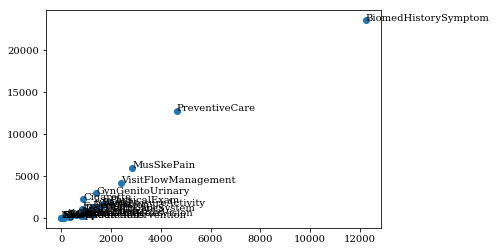

In [2]:
import csv

classes = []
params = np.zeros((num_classes, 3))

with open('jamia_hgru_128_output_df.csv', 'r') as f:
    reader = csv.DictReader(f)
    for i, line in enumerate(reader):
        classes.append(int(line['Predicted_Class_k']))
        params[i, 0] = int(line['R_k'])
        params[i, 1] = int(line['N_k']) - int(line['R_k'])
        if len(line['Conf_k']) == 0:
            params[i, 2] = 0.0
        else:
            params[i, 2] = float(line['Conf_k'])

params[:, 0:2] += 1
            
class_dict = {row[0] : row[1] for _, row in pd.read_csv("data/jamia/labid2name.csv", header=None).iterrows()}
classes = [class_dict[idx] for idx in classes]
df = pd.read_csv('jamia_hgru_128_output_df.csv')
    
plt.scatter(params[:,1], params[:,0])
for i, _class in enumerate(classes):
    plt.annotate(_class, (params[i,1], params[i,0]))

In [3]:
# Sort by accuracy
accuracy = params[:,0] / (params[:,0] + params[:,1])
print(accuracy)
sort_idx = np.argsort(accuracy)

params = params[sort_idx,:]
classes = [classes[i] for i in sort_idx]
print(params)
print(classes )

[0.65796089 0.27252747 0.49536866 0.56929418 0.56052632 0.3442623
 0.7136393  0.05882353 0.14141414 0.6747838  0.50815109 0.32545045
 0.37816844 0.47265625 0.2312812  0.49311295 0.5        0.33877551
 0.20649351 0.21477833 0.63639111 0.48905879 0.67610866 0.49669604
 0.5        0.38990826 0.73337934]
[[1.00000000e+00 1.60000000e+01 3.82503727e-01]
 [1.40000000e+01 8.50000000e+01 3.08658062e-01]
 [3.18000000e+02 1.22200000e+03 4.05464516e-01]
 [2.18000000e+02 7.97000000e+02 3.37346334e-01]
 [2.78000000e+02 9.24000000e+02 4.32023807e-01]
 [1.24000000e+02 3.31000000e+02 4.44353102e-01]
 [2.89000000e+02 5.99000000e+02 3.75209383e-01]
 [1.66000000e+02 3.24000000e+02 3.58286661e-01]
 [2.10000000e+01 4.00000000e+01 4.19252119e-01]
 [9.25000000e+02 1.52100000e+03 4.67550843e-01]
 [5.10000000e+02 7.98000000e+02 5.26114181e-01]
 [1.45200000e+03 1.62000000e+03 4.42008059e-01]
 [1.85500000e+03 1.93800000e+03 5.74454216e-01]
 [1.61100000e+03 1.65600000e+03 5.31532649e-01]
 [1.33700000e+03 1.3620000

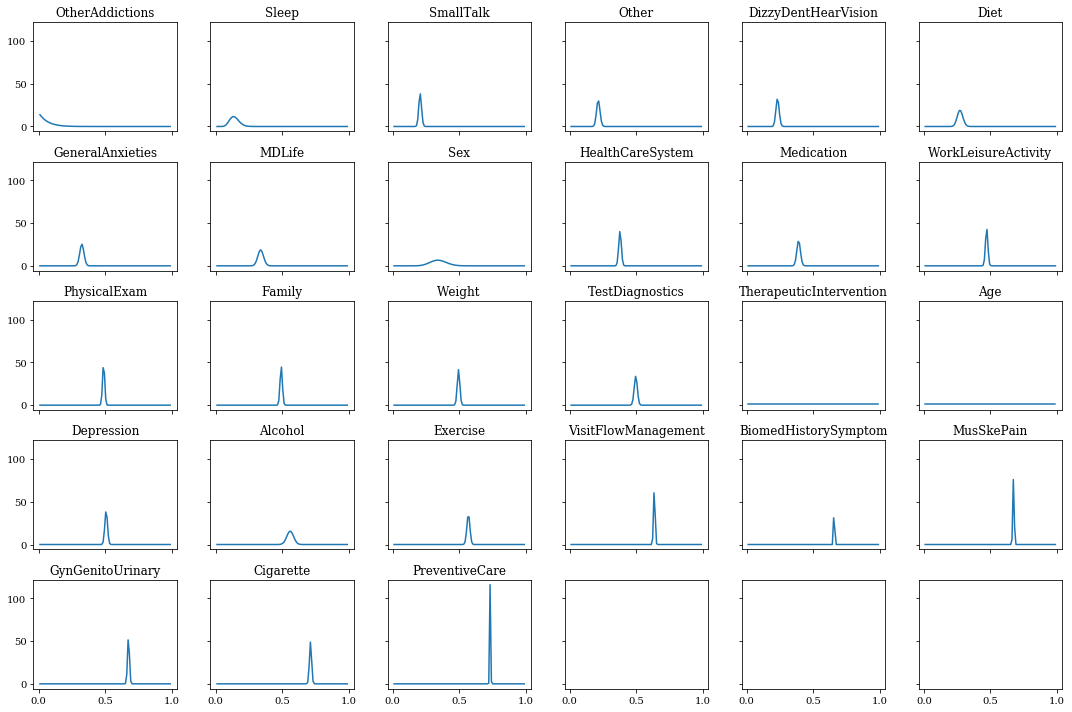

In [4]:
x = np.linspace(0.01, 0.99, 100)

fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(15, 10), sharex=True, sharey=True)

for predicted_class, _params, ax in zip(classes, params, axs.flatten()):
    y = beta.pdf(x, _params[0], _params[1])
    ax.plot(x, y)
    ax.set_title(predicted_class)

fig.tight_layout()

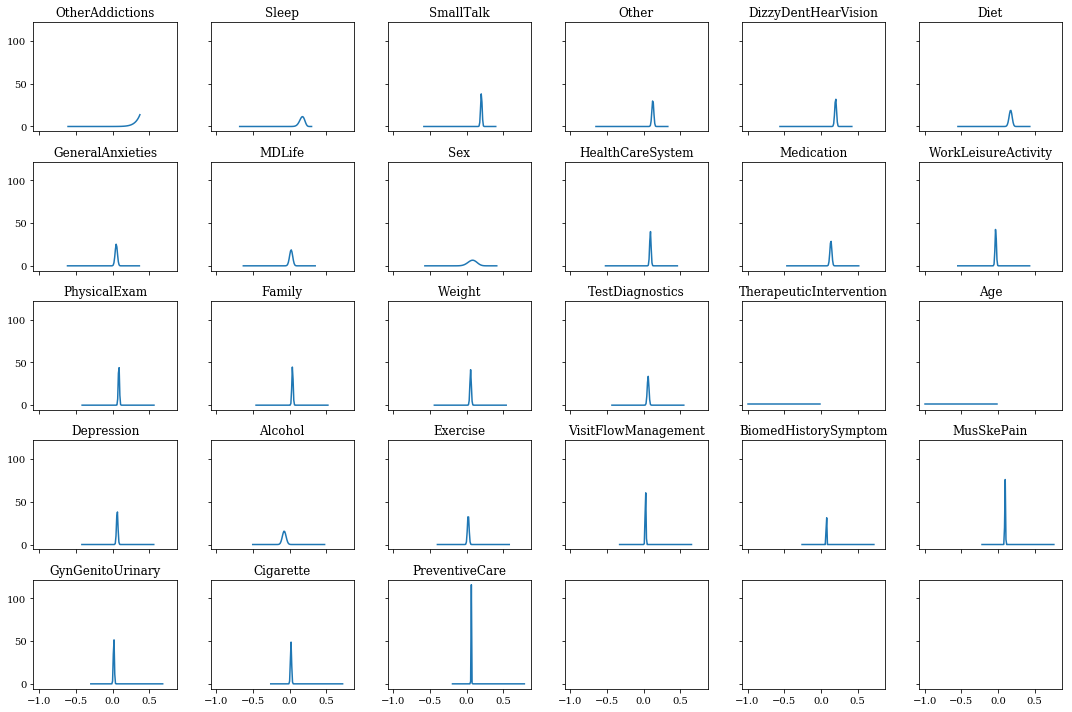

In [5]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(15, 10), sharex=True, sharey=True)

for predicted_class, _params, ax in zip(classes, params, axs.flatten()):
    y = beta.pdf(x, _params[0], _params[1])
    ax.plot(_params[2] - x, y)
    ax.set_title(predicted_class)
    
fig.tight_layout()

0 1.0 16.0
1 14.0 85.0
2 318.0 1222.0
3 218.0 797.0
4 278.0 924.0
5 124.0 331.0
6 289.0 599.0
7 166.0 324.0
8 21.0 40.0
9 925.0 1521.0
10 510.0 798.0
11 1452.0 1620.0
12 1855.0 1938.0
13 1611.0 1656.0
14 1337.0 1362.0
15 902.0 914.0
16 1.0 1.0
17 1.0 1.0
18 1278.0 1237.0
19 213.0 167.0
20 1105.0 836.0
21 4211.0 2406.0
22 23555.0 12245.0
23 5930.0 2858.0
24 2912.0 1395.0
25 2208.0 886.0
26 12752.0 4636.0


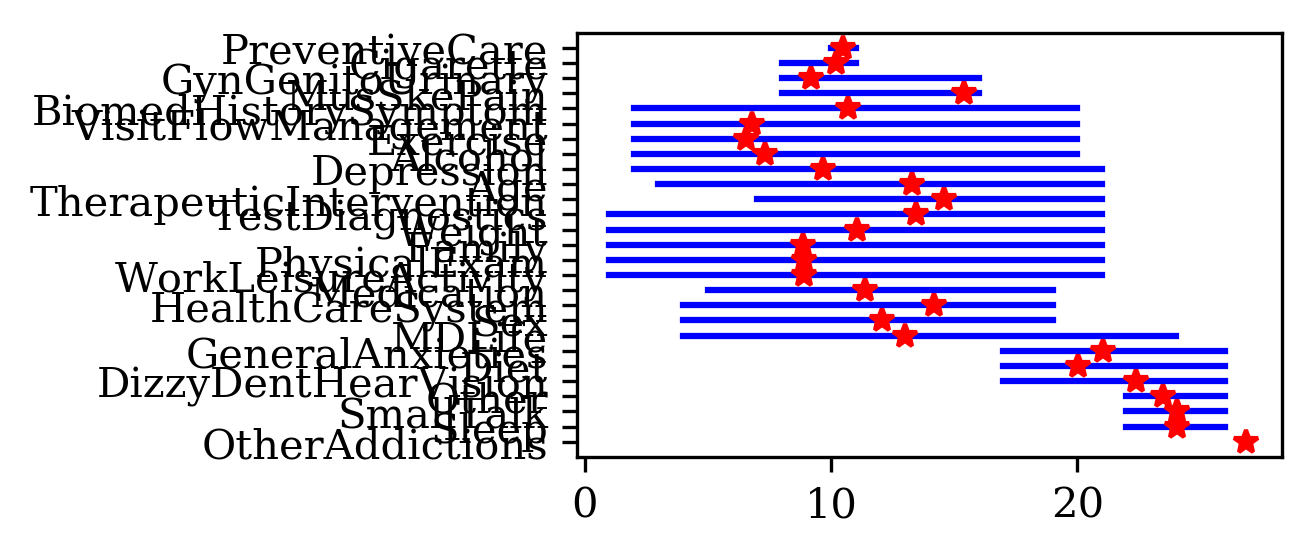

In [8]:
# Single column
plt.figure(figsize=(3.03, 3.03 / 1.618), dpi=300)
# # Double column
# plt.figure(figsize=(6.30, 6.30 / 1.618), dpi=300)

n_samples = 10_000
monte_carlo_samples = np.zeros((num_classes, n_samples))

# Accuracy ranking
if mode == "accuracy":
    for i in range(num_classes):
        monte_carlo_samples[i,:] = np.random.beta(params[i,0], params[i,1], n_samples)

# Bias ranking
if mode == 'bias':
    for i in range(num_classes):
        print(i, params[i,0], params[i,1])
        monte_carlo_samples[i,:] = np.random.beta(params[i,0], params[i,1], n_samples) - params[i, 2]

    
ranks = num_classes - np.argsort(monte_carlo_samples, axis=0)
intervals = np.quantile(ranks, (0.05, 0.95), axis=1)
avg_ranks = np.mean(ranks, axis=1)

for i in range(num_classes):
    plt.plot([intervals[0, i], intervals[1, i]], [i, i], c='blue')
    plt.plot(avg_ranks[i], i, marker='*', c='red')


plt.ylim(-1, num_classes)

plt.yticks(ticks = list(range(num_classes)), labels = classes);
plt.savefig("ranking_jamia_%s" % mode, format='pdf')

In [7]:
params[:,0]/(params[:,0] + params[:,1]) - params[:,2]

array([-0.3236802 , -0.16724392, -0.19897101, -0.12256801, -0.20074261,
       -0.17182563, -0.04975893, -0.01951115, -0.07498982, -0.08938241,
       -0.13620592,  0.03064819, -0.08539542, -0.0384197 , -0.05287512,
       -0.05861183,  0.5       ,  0.5       , -0.06304737,  0.07409052,
       -0.02063936, -0.02372802, -0.07496346, -0.09764728, -0.01694039,
       -0.0182842 , -0.06224421])